# 1

Пусть $x_1, \ldots, x_n \sim \mathcal{N}(\mu, \sigma^2)$ набор iid случайно распределенных величин, с неизвестными параметрами $\mu, \sigma^2$.
Во время эксперимента были получены следующие значения: 0.88, 1.07, 1.27, 1.54, 1.91, 2.27, 3.84, 4.50, 4.64, 9.41

## 1.1
Выписать ф-цию правдоподобия $\mathcal{L}(\mu, \sigma^2)$. Построить двумерный contour plot функции правдоподобия для коэффициентов доверия 10%, 50%, 68%, 90%

$$\mathcal{L}(\mu, \sigma^2) = \Pi_{i=1}^n \rho(\mu, \sigma^2) =  \Pi_{i=1}^n \dfrac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}} = \dfrac{1}{(2\pi\sigma^2)^{\frac{n}{2}}} exp\left(\dfrac{-1}{2\sigma^2}\sum_{i=1}^n (x_i-\mu)^2\right) $$

Из ЦПТ: 

$$P\left(\overline{x} - \dfrac{s}{\sqrt{n}} z_{\alpha/2} < \mu < \overline{x} + \dfrac{s}{\sqrt{n}} z_{\alpha/2}\right) = 1 - \alpha$$

$\overline{x}$ выборочное среднее, $s^2$ выборочная дисперсия, $z_{\alpha}$ квантили распределения Стьюдента

$$P\left(\dfrac{(n-1)s^2}{\chi_2^2} < \sigma^2 < \dfrac{(n-1)s^2}{\chi_1^2}\right) = \gamma$$

При $P\left(\chi_1^2 < \dfrac{(n-1)s^2}{\sigma^2} < \chi_2^2 \right) = \gamma \ \ \ \chi^2 $ распределение с n-1 степенью свободы




In [169]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import warnings
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=2)

In [72]:
n = 10
experiment = np.array([0.88, 1.07, 1.27, 1.54, 1.91, 2.27, 3.84, 4.50, 4.64, 9.41])
sample_mean = experiment.mean()
sample_variance =  ((experiment - sample_mean)**2).sum() / (n - 1)
qs = [0.1, 0.5, 0.68, 0.90]
mu_intervals = []
sigma_intervals = []
for q in qs:
    z_a = stats.t(df=n-1).ppf(q = (1 - q) / 2)
    mu_intervals.append([sample_mean + sample_variance * z_a / n**0.5,
                           sample_mean - sample_variance * z_a / n**0.5])
    interval = stats.chi2(df=n-1).interval(alpha=q)
    sigma_intervals.append([(n-1) * sample_variance / interval[1], (n-1) * sample_variance / interval[0]])

In [73]:
print(mu_intervals[0][0], mu_intervals[0][1])
print(sigma_intervals[0][0], sigma_intervals[0][1])

2.8531481923556314 3.4128518076443686
6.952505620531017 7.8564247476410545


In [ ]:
def get_likelihood(x, mu, sigma_sq):
    return stats.norm.pdf(x, mu, sigma_sq**0.5).prod()
    
def plot_contours(x, q):
    plt.figure(figsize=(10, 7))
    z_a = stats.t(df=n-1).ppf(q = (1 - q) / 2)
    mu_interval = [sample_mean + sample_variance * z_a / n**0.5,
                           sample_mean - sample_variance * z_a / n**0.5]
    print('confidence interval for mu with confidence level ', q, ': (', mu_interval[0], ', ',  mu_interval[1], ')' )
    interval = stats.chi2(df=n-1).interval(alpha=q)
    sigma_sq_interval = [(n-1) * sample_variance / interval[1], (n-1) * sample_variance / interval[0]]
    print('confidence interval for sigma squared with confidence level ', q, ': (',
          sigma_sq_interval[0], ', ',  sigma_sq_interval[1], ')' )
    mus = np.linspace(mu_interval[0], mu_interval[1], 10)
    sigma_sqs = np.linspace(sigma_sq_interval[0], sigma_sq_interval[1], 10)
    mus, sigma_sqs = np.meshgrid(mus, sigma_sqs)
    likelihoods = []
    for mu, sigma_sq in zip(mus.ravel(), sigma_sqs.ravel()):
        likelihoods.append(stats.norm.pdf(x, mu, sigma_sq**0.5).prod())
    likelihoods = np.array(likelihoods).reshape(mus.shape)
    contours = plt.contour(mus, 
                           sigma_sqs, 
                           likelihoods,
                       cmap='RdBu')
    plt.colorbar();

confidence interval for mu with confidence level  0.1 : ( 2.8531481923556314 ,  3.4128518076443686 )
confidence interval for sigma squared with confidence level  0.1 : ( 6.952505620531017 ,  7.8564247476410545 )


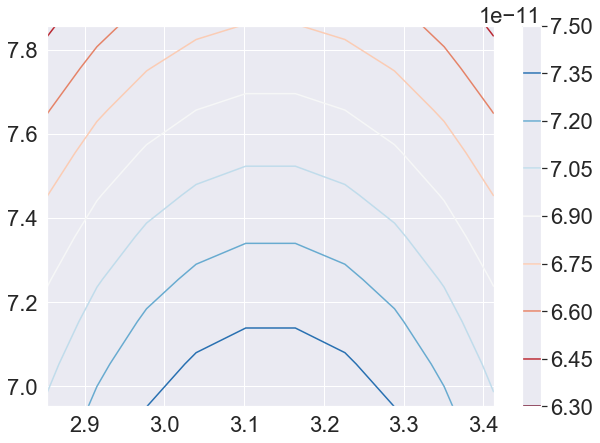

In [75]:
plot_contours(experiment, 0.1)

confidence interval for mu with confidence level  0.5 : ( 1.6115021139088954 ,  4.654497886091105 )
confidence interval for sigma squared with confidence level  0.5 : ( 5.410708129165645 ,  10.44635173550412 )


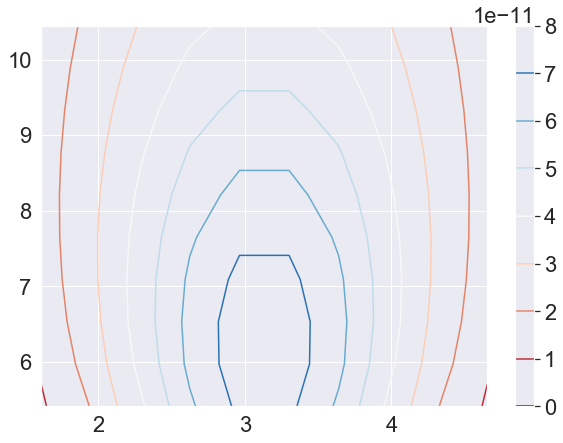

In [76]:
plot_contours(experiment, 0.5)

confidence interval for mu with confidence level  0.68 : ( 0.8541475415416317 ,  5.411852458458368 )
confidence interval for sigma squared with confidence level  0.68 : ( 4.719044250025477 ,  12.488413636737942 )


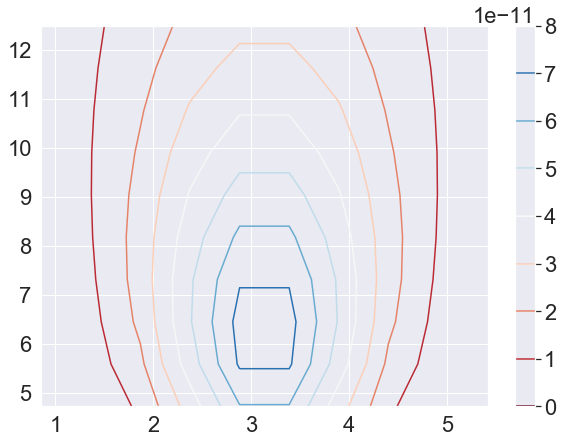

In [77]:
plot_contours(experiment, 0.68)

confidence interval for mu with confidence level  0.9 : ( -0.8359619359410564 ,  7.101961935941056 )
confidence interval for sigma squared with confidence level  0.9 : ( 3.642135561617606 ,  18.532065799958108 )


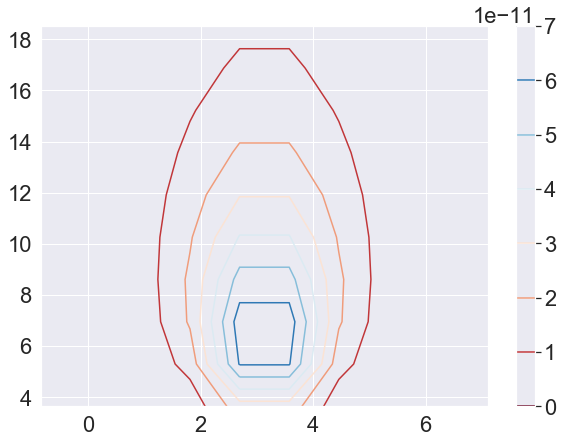

In [78]:
plot_contours(experiment, 0.9)

## 1.2

Построение оценки максимального правдоподобия $\sigma^2$ при фиксированном $\mu$
$$\mathcal{L}(\mu, \sigma^2) = \Pi_{i=1}^n \rho(\mu, \sigma^2) =  \Pi_{i=1}^n \dfrac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}} = \dfrac{1}{(2\pi\sigma^2)^{\frac{n}{2}}} exp\left(\dfrac{-1}{2\sigma^2}\sum_{i=1}^n (x_i-\mu)^2\right) $$

$$\log \mathcal{L} = -\dfrac{n}{2}\log(2 \pi) - \dfrac{n}{2}\log \sigma^2  - \dfrac{\sum_{i=1}^n (x_i - \mu)^2}{2\sigma^2}$$

$$\log \mathcal{L}'_{\sigma^2} = \dfrac{-n}{2\sigma^2} + \dfrac{\sum_{i=1}^n (x_i - \mu)^2}{2 (\sigma^2)^2}  = \dfrac{\sum_{i=1}^n (x_i - \mu)^2 - n\sigma^2}{2(\sigma^2)^2} = 0$$

$$\sigma^2_{\mu} = \dfrac{\sum_{i=1}^n (x_i - \mu)^2}{n}$$


Функция профильного правдоподобия для $\sigma^2_{\mu}$

$$\mathcal{L}(\mu, \sigma^2_{\mu}) = \dfrac{n^{\frac{n}{2}}}{(2\pi\sum_{i=1}^n (x_i - \mu)^2)^{\frac{n}{2}}} exp\left(\dfrac{-n}{2\sum_{i=1}^n (x_i - \mu)^2}\sum_{i=1}^n (x_i-\mu)^2\right) = \dfrac{n^{\frac{n}{2}}}{(2\pi\sum_{i=1}^n (x_i - \mu)^2)^{\frac{n}{2}}}  e^{\frac{-n}{2}} = \left(\dfrac{n}{2\pi\sum_{i=1}^n (x_i - \mu)^2 e}\right)^{\frac{n}{2}}$$

График зависимости от $\mu$

Text(0, 0.5, 'likelihood')

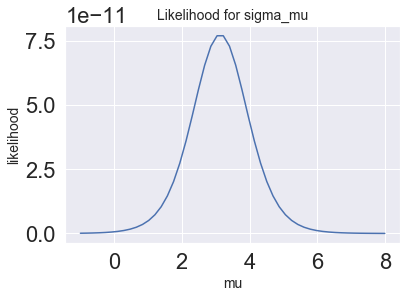

In [79]:
def likelihood(x, mu, n):
    return (n / (2 * np.pi * ((x - mu)**2).sum() * np.e))**(n/2)

mus = np.linspace(-1, 8, 50)
plt.plot(mus, [likelihood(experiment, mu, n) for mu in mus])
plt.title("Likelihood for sigma_mu", fontsize=14)
plt.xlabel("mu", fontsize=14)
plt.ylabel("likelihood", fontsize=14)

## 1.3
Построить на том же графике $\mathcal{L}(\mu, \sigma^2 = \hat{\sigma}^2)$ и $\mathcal{L}(\mu, \sigma^2 = 1)$

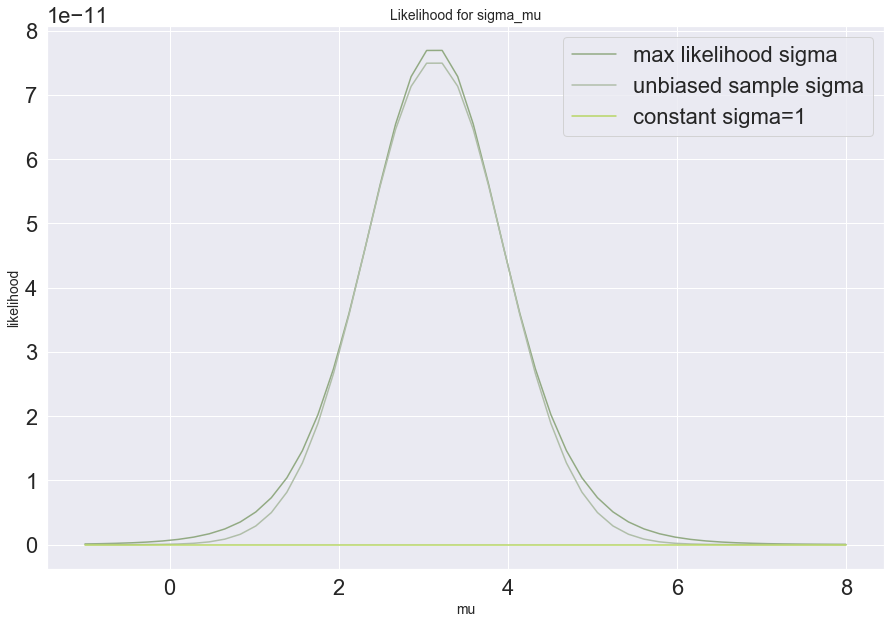

In [80]:
def get_likelihood(x, mu, n, sigma_sq_f):
    sigma_sq = sigma_sq_f(x, mu, n)
    return 1/(2 * np.pi * sigma_sq)**(n / 2) * np.exp(-1/(2 * sigma_sq) * ((x - mu)**2).sum())

def sigma_likelihood(x, mu, n):
    return ((x - mu)**2).sum() / n

def sigma_unbiased(x, mu, n):
    return ((x - x.mean())**2).sum() / (n - 1)

def sigma_const(x, mu, n):
    return 1

def get_log_likelihood(x, mu, n, sigma_sq_f):
    sigma_sq = sigma_sq_f(x, mu, n)
    return -n/2 * np.log(2 * np.pi * sigma_sq) + -1/(2 * sigma_sq) * ((x - mu)**2).sum()


mus = np.linspace(-1, 8, 50)
plt.figure(figsize=(15, 10))
plt.plot(mus, [get_likelihood(experiment, mu, n, sigma_likelihood) for mu in mus], label='max likelihood sigma', 
         color='#92AA83')
plt.plot(mus, [get_likelihood(experiment, mu, n, sigma_unbiased) for mu in mus], label='unbiased sample sigma',
         color='#B0BEA9')
plt.plot(mus, [get_likelihood(experiment, mu, n, sigma_const) for mu in mus], label='constant sigma=1', 
         color='#B7D664')
plt.title("Likelihood for sigma_mu", fontsize=14)
plt.xlabel("mu", fontsize=14)
plt.ylabel("likelihood", fontsize=14)
plt.legend()

Посмотрим еще на эти графики по отдельности

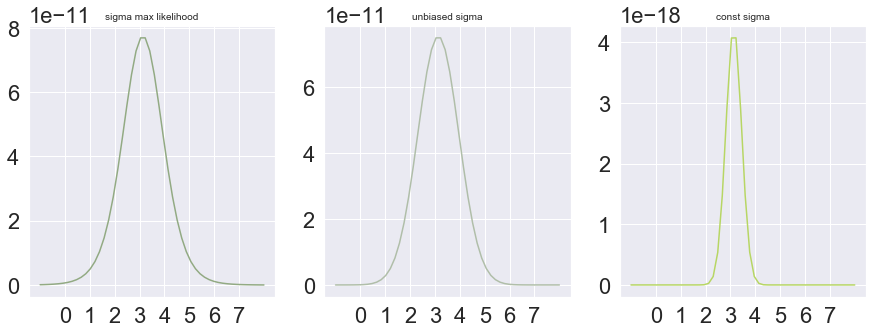

In [81]:
f, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot(mus, [get_likelihood(experiment, mu, n, sigma_likelihood) for mu in mus], label='max likelihood sigma', 
         color='#92AA83')
axes[0].set_title('sigma max likelihood', fontsize = 10)
axes[0].set_xticks(np.arange(0, 8))
axes[1].plot(mus, [get_likelihood(experiment, mu, n, sigma_unbiased) for mu in mus], label='unbiased sample sigma',
         color='#B0BEA9')
axes[1].set_xticks(np.arange(0, 8))
axes[1].set_title('unbiased sigma', fontsize = 10)
axes[2].plot(mus, [get_likelihood(experiment, mu, n, sigma_const) for mu in mus], label='constant sigma=1',
         color='#B7D664')
axes[2].set_xticks(np.arange(0, 8))
axes[2].set_title('const sigma', fontsize = 10);

Чтобы построить 68% доверительный интервал применим теорему Вилькса:

$$P\left( \log \mathcal{L}_{\mu}(\mu, \sigma^2) - \log \mathcal{L}_{*}(\mu, \sigma^2) > -\dfrac{\chi^2_1{\alpha}}{2} \right) = \alpha, \ \alpha=0.68$$

In [82]:
mus = np.linspace(-5, 15, 100000)
max_likelihood = np.log([get_likelihood(experiment, mu, n, sigma_likelihood) for mu in mus])
sample = np.log([get_likelihood(experiment, mu, n, sigma_unbiased) for mu in mus])
const = np.log([get_likelihood(experiment, mu, n, sigma_const) for mu in mus])
#потом уже поняла, что можно было просто взять оценку макс. правдоподобия, чтобы не вычислять
max_likelihood_max = max_likelihood.max()
sample_max = sample.max()
const_max = const.max()

In [83]:
q = 0.68
cut_level = stats.chi2.ppf(q=q, df=1) / 2
likelihood_interval = np.array([])
unbiased_interval = np.array([])
const_interval = np.array([])
for mu in mus:
    if get_log_likelihood(experiment, mu, n, sigma_likelihood) - max_likelihood_max > -cut_level:
        likelihood_interval = np.append(likelihood_interval, mu)
    if get_log_likelihood(experiment, mu, n, sigma_unbiased) - sample_max > -cut_level:
        unbiased_interval = np.append(unbiased_interval, mu)

    if get_log_likelihood(experiment, mu, n, sigma_const) - const_max > -cut_level:
        const_interval = np.append(const_interval, mu) 

if not likelihood_interval.size == 0:
    print("confidence interval for mu with confidence level 0.68 and max likelihood sigma: ", '(', 
      "%.4f" % likelihood_interval.min(), ', ', "%.4f" % likelihood_interval.max(), ')')
if not unbiased_interval.size == 0:
    print("confidence interval for mu with confidence level 0.68 and sample unbiased sigma: ", '(', 
     "%.4f" % unbiased_interval.min(), ', ', "%.4f" % unbiased_interval.max(), ')')
if not const_interval.size == 0:
    print("confidence interval for mu with confidence level 0.68 and const sigma: ", '(', 
     "%.4f" % const_interval.min(), ', ', "%.4f" % const_interval.max(), ')')

mu_true = 3

confidence interval for mu with confidence level 0.68 and max likelihood sigma:  ( 2.3327 ,  3.9333 )
confidence interval for mu with confidence level 0.68 and sample unbiased sigma:  ( 2.3103 ,  3.9557 )
confidence interval for mu with confidence level 0.68 and const sigma:  ( 2.8187 ,  3.4473 )


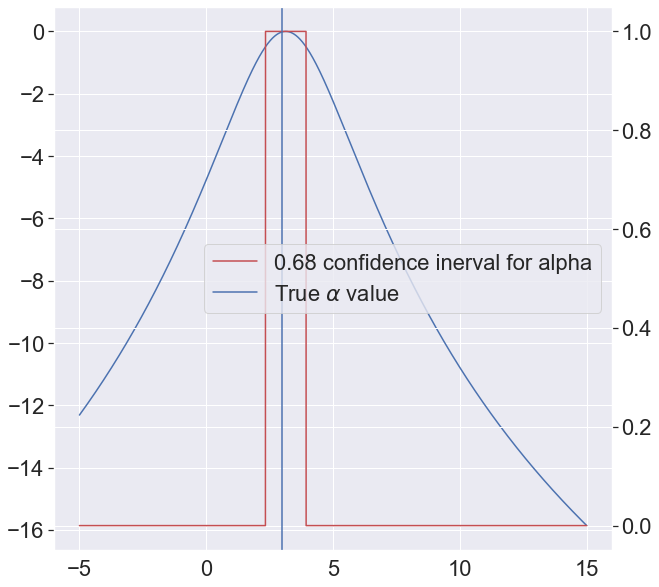

In [84]:
plt.figure(figsize=(10, 10))
plt.plot(mus, 
         (max_likelihood - max_likelihood_max), 
         label='Likelihood value')
plt.twinx()
plt.plot(mus, 
         (max_likelihood - max_likelihood_max > -cut_level), 
         c='r', label='{} confidence inerval for alpha'.format(q))
plt.axvline(mu_true, label=r'True $\alpha$ value')
plt.legend()
plt.show()

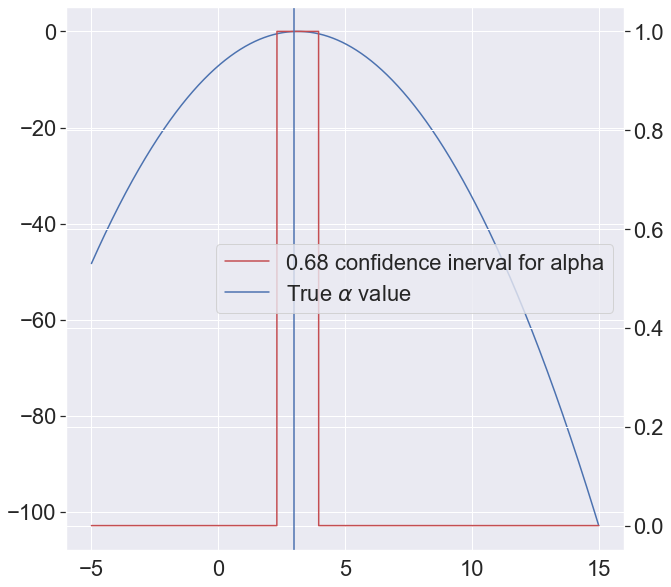

In [85]:
plt.figure(figsize=(10, 10))
plt.plot(mus, 
         (sample - sample_max), 
         label='Likelihood value')
plt.twinx()
plt.plot(mus, 
         (sample - sample_max > -cut_level), 
         c='r', label='{} confidence inerval for alpha'.format(q))
plt.axvline(mu_true, label=r'True $\alpha$ value')
plt.legend()
plt.show()

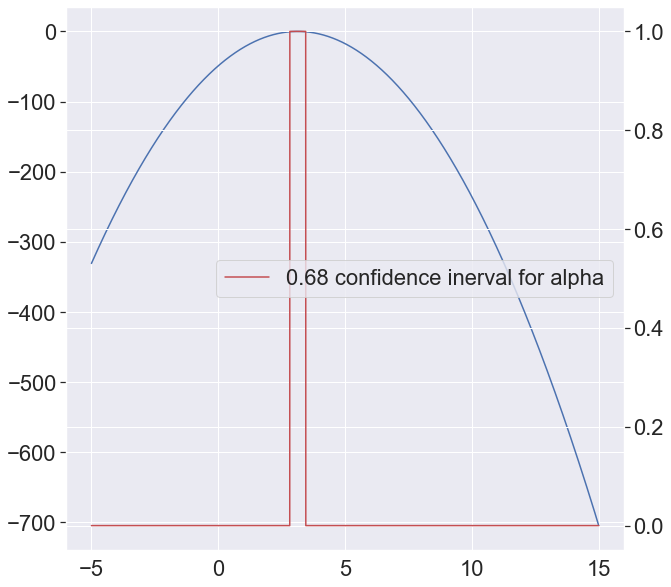

In [86]:
plt.figure(figsize=(10, 10))
plt.plot(mus, 
         (const - const_max), 
         label='Likelihood value')
plt.twinx()
plt.plot(mus, 
         (const - const_max > -cut_level), 
         c='r', label='{} confidence inerval for alpha'.format(q))
plt.legend()
plt.show()

Найдем параметры макс правдоподобия для каждого случая аналитически

$$\mathcal{L}_1 = \left(\dfrac{n}{2\pi\sum_{i=1}^n (x_i - \mu)^2 e}\right)^{\frac{n}{2}}$$


$\log \mathcal{L}_1 = \dfrac{n}{2}\log \dfrac{n}{2\pi e} - \dfrac{n}{2}\log \sum_{i=1}^n (x_i - \mu)^2$

$\log \mathcal{L}_1' = -\dfrac{n}{2} \dfrac{2n\mu - 2\sum_{i=1}^n x_i}{\sum_{i=1}^n (x_i - \mu)^2}$

$\mu_1 = \overline{x}$

$$\mathcal{L}_2(\mu, \sigma^2_{\mu}) = \dfrac{(n - 1)^{\frac{n}{2}}}{(2\pi\sum_{i=1}^n (x_i - \overline{x})^2)^{\frac{n}{2}}} exp\left(\dfrac{-(n -1)}{2\sum_{i=1}^n (x_i - \overline{x})^2}\sum_{i=1}^n (x_i-\mu)^2\right) = \dfrac{(n - 1)^{\frac{n}{2}}}{(2\pi\sum_{i=1}^n (x_i - \mu)^2)^{\frac{n}{2}}} exp\left(\dfrac{-(n -1)}{2\sum_{i=1}^n (x_i - \overline{x})^2}\sum_{i=1}^n (x_i-\mu)^2\right)$$


$\log \mathcal{L_2} = \log \dfrac{(n - 1)^{\frac{n}{2}}}{(2\pi\sum_{i=1}^n (x_i - \overline{x})^2)^{\frac{n}{2}}}  + 
\dfrac{-(n -1)}{2\sum_{i=1}^n (x_i - \overline{x})^2} \sum_{i=1}^n (x_i-\mu)^2 $

$\log \mathcal{L_2}' = \dfrac{-(n -1)( 2n\mu - 2\sum_{i=1}^n x_i)}{2\sum_{i=1}^n (x_i - \overline{x})^2} $

$\mu = \overline{x}$

$$\mathcal{L_3} = \dfrac{1}{(2 \pi)^{\frac{n}{2}}} exp({-\dfrac{1}{2} \sum_{i=1}^n (x_i-\mu)^2 })$$


$\log \mathcal{L_3} = -\dfrac{n}{2}\log{2 \pi} - \dfrac{1}{2}\sum_{i=1}^n (x_i - \mu)^2$

$\mu = \overline{x}$

In [87]:
sample_size = 100
hit_max_likelihood = 0
hit_sample = 0 
hit_const = 0
true_mu = 3
for i in range(100):
    new_experiment = stats.norm.rvs(loc = true_mu, scale = 6, size=sample_size)   
    x_mean = new_experiment.mean()
    max_likelihood_max = get_log_likelihood(new_experiment, x_mean, sample_size, sigma_likelihood)
    sample_max = get_log_likelihood(new_experiment, x_mean, sample_size, sigma_unbiased)
    const_max = get_log_likelihood(new_experiment, x_mean, sample_size, sigma_const)
    likelihood_interval = np.array([])
    unbiased_interval = np.array([])
    const_interval = np.array([])
    for mu in mus:
        if get_log_likelihood(new_experiment, mu, sample_size, sigma_likelihood) - max_likelihood_max > -cut_level:
            likelihood_interval = np.append(likelihood_interval, mu)
        if get_log_likelihood(new_experiment, mu, sample_size, sigma_unbiased) - sample_max > -cut_level:
            unbiased_interval = np.append(unbiased_interval, mu)
        if get_log_likelihood(new_experiment, mu, sample_size, sigma_const) - const_max > -cut_level:
            const_interval = np.append(const_interval, mu) 
    if likelihood_interval.min() < true_mu < likelihood_interval.max():
        hit_max_likelihood += 1
    if unbiased_interval.min() < true_mu < unbiased_interval.max():
        hit_sample += 1
    if const_interval.min() < true_mu < const_interval.max():
        hit_const += 1
print("Покрытие с сигмой как оценкой макс правдоподобия:", hit_max_likelihood * 100 / 100, '%')
print("Покрытие с сигмой как выборочное среднее:", hit_sample * 100 / 100, '%')
print("Покрытие с константной сигмой: ", hit_const * 100 / 100, '%')

Покрытие с сигмой как оценкой макс правдоподобия: 73.0 %
Покрытие с сигмой как выборочное среднее: 73.0 %
Покрытие с константной сигмой:  19.0 %


## 1.4 
Профильное правдоподобие по $\sigma^2$, и правдоподобие из $\chi_{n-1}^2$

Знаем, что (n-1)$\dfrac{s^2}{\sigma^2} \sim \chi_{n-1}^2$

Значит 


$\log \mathcal{L} = log \rho_{\chi_{n-1}^2}\left(\dfrac{s^2(n-1)}{\sigma^2}\right)  = log \dfrac{1}{2^\frac{n-1}{2}\Gamma\left({\frac{n-1}{2}}\right)}\left(\dfrac{s^2(n-1)}{\sigma^2}\right)^{\frac{n-3}{2}} exp{-\left(\dfrac{s^2(n-1)}{2\sigma^2}\right) } = log\dfrac{1}{2^\frac{n-1}{2}\Gamma\left({\frac{n-1}{2}}\right)} + \dfrac{n-3}{2}log\left(\dfrac{s^2(n-1)}{\sigma^2}\right) - \left(\dfrac{s^2(n-1)}{2\sigma^2}\right)$


$\log \mathcal{L}'_{\sigma^2} = -\dfrac{n-3}{2\sigma^2} + \dfrac{s^2(n-1)}{2(\sigma^2)^2}$

$\sigma^2 = \dfrac{s^2(n-1)}{(n-3)}$

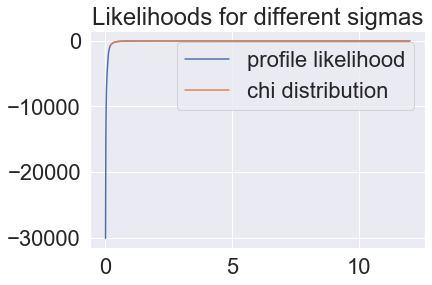

In [56]:
warnings.filterwarnings('ignore')
def get_log_likelihood_sigma(x, mu, n, sigma_sq):
    return -n / 2 * np.log(2 * np.pi * sigma_sq) - 1/(2 * sigma_sq) * ((x - mu)**2).sum()
    
sigmas = np.linspace(0, 12, 1000)
mus = np.linspace(-5, 15, 100)
max_likelihoods = []
chi_likelihoods = []
for sigma in sigmas:
    max_likelihood_profile = get_log_likelihood_sigma(experiment, mus[0], n, sigma)
    for mu in mus:
        #print(get_log_likelihood_sigma(experiment, mu, n, sigma**2))
        max_likelihood_profile = max(max_likelihood_profile, get_log_likelihood_sigma(experiment, mu, n, sigma**2))
    max_likelihoods.append(max_likelihood_profile)
    chi_likelihood = np.log(stats.chi2(df=n-1).pdf(((experiment - experiment.mean())**2).sum() / sigma**2))
    #print(chi_likelihood)
    chi_likelihoods.append(chi_likelihood)
plt.plot(sigmas, max_likelihoods, label = 'profile likelihood')
plt.plot(sigmas, chi_likelihoods, label= 'chi distribution')
plt.title("Likelihoods for different sigmas")
plt.legend()

In [58]:
likelihood_interval = np.array([])
chi2_interval = np.array([])
max_likelihood_mu = get_log_likelihood_sigma(experiment, sample_mean, n, sample_variance)
max_likelihood_chi = stats.chi2(df=n-1).logpdf(n-3)
for sigma in sigmas:
    max_likelihood_profile = get_log_likelihood_sigma(experiment, mus[0], n, sigma**2)
    for mu in mus:
        max_likelihood_profile = max(max_likelihood_profile 
                                 , get_log_likelihood_sigma(experiment, mu, n, sigma**2))
        if max_likelihood_profile - max_likelihood_mu > -cut_level:
            likelihood_interval = np.append(likelihood_interval, sigma)
    chi_likelihood = stats.chi2(df=n-1).logpdf(((n - 1) * sample_variance / sigma**2))
    if chi_likelihood - max_likelihood_chi > -cut_level:
        chi2_interval = np.append(chi2_interval, sigma)
print(likelihood_interval.min(), likelihood_interval.max())
print(chi2_interval.min(), chi2_interval.max())

2.018018018018018 3.171171171171171
2.33033033033033 3.963963963963964


In [69]:
sample_size = 100
hit_max_likelihood = 0
hit_chi2 = 0 

true_mu, true_sigma = 3, 6
for i in range(100):
    new_experiment = stats.norm.rvs(loc = true_mu, scale = true_sigma, size=sample_size)   
    x_mean = new_experiment.mean()
    sample_variance = ((new_experiment - x_mean)**2).sum() / (sample_size - 1)
    max_likelihood_mu = get_log_likelihood_sigma(new_experiment, x_mean, sample_size, sample_variance)
    max_likelihood_chi = stats.chi2(df=sample_size-1).logpdf(sample_size-3)
    likelihood_interval = np.array([])
    chi2_interval = np.array([])
    for sigma in sigmas:
        max_likelihood_profile = get_log_likelihood_sigma(new_experiment, mus[0], sample_size, sigma**2)
        for mu in mus:
            max_likelihood_profile = max(max_likelihood_profile 
                                     , get_log_likelihood_sigma(new_experiment, mu, sample_size, sigma**2))
            if max_likelihood_profile - max_likelihood_mu > -cut_level:
                likelihood_interval = np.append(likelihood_interval, sigma)
        chi_likelihood = stats.chi2(df=sample_size - 1).logpdf(((sample_size - 1) * sample_variance / sigma**2))
        if chi_likelihood - max_likelihood_chi > -cut_level:
            chi2_interval = np.append(chi2_interval, sigma)

    if likelihood_interval.min() < true_sigma < likelihood_interval.max():
        hit_max_likelihood += 1
    if chi2_interval.min() < true_sigma < chi2_interval.max():
        hit_chi2 += 1
print("Покрытие через хи-квадрат:", hit_chi2 * 100 / 100, '%')
print("Покрытие с сигмой как выборочное среднее:", hit_max_likelihood * 100 / 100, '%')

Покрытие через хи-квадрат: 68.0 %
Покрытие с сигмой как выборочное среднее: 67.0 %


# 2

Y = $R sin\theta$,

$\sigma_{R}, \sigma_{\theta}$ известны

Найти дисперсию Y

Применим дельта-метод для многомерной функции h:

$\sqrt{n}(h(B) - h(\beta)) \to \mathcal{N}(0, \nabla h(\beta)^T \Sigma \nabla h(\beta))$

Считаем, что R и $\theta$ независимые величины:

В условии теоремы $\beta = \mathbb{E}B, \ \overline{B}_m \to \mathbb{E}B$, поэтому возьмем выборочное среднее


$\dfrac{\sum{i=1}^m \theta_i}{m} = \overline{\theta}_m,\  \dfrac{\sum{i=1}^m R_i}{m} = \overline{R}_m$

$h -$ численная функция от двух переменных: $h(R, \theta) = R \cdot \sin \theta$


$$\Sigma = \begin{pmatrix}
\sigma_R^2 && 0 \\
0 && \sigma_{\theta}^2
\end{pmatrix}, \ 
\nabla h = \begin{pmatrix}
\sin\theta \\
R \cos \theta
\end{pmatrix}, \
\nabla h(\beta) = \begin{pmatrix}
\sin \overline{\theta}_m \\
\overline{R}_m \cos \overline{\theta}_m
\end{pmatrix}
$$

$$\mathbb{D}Y = (\sin \overline{\theta}_m, \overline{R}_m \cos \overline{\theta}_m) \cdot \begin{pmatrix}
\sigma_R^2 && 0 \\
0 && \sigma_{\theta}^2
\end{pmatrix} \cdot \begin{pmatrix}
\sin \overline{\theta}_m \\
\overline{R}_m \cos \overline{\theta}_m
\end{pmatrix} = sin^2 \overline{\theta}_m \sigma_{R}^2+ \overline{R}^2_m cos^2 \overline{\theta}_m \sigma_{\theta}^2 $$

$D(Y)'_{\theta} = 2\sin \overline{\theta}_m  \cos\overline{\theta}_m \sigma_{R}^2 -  2\overline{R}^2_m \cos\overline{\theta}_m \sin\overline{\theta}_m \sigma_{\theta}^2 = 0$

$\cos\overline{\theta}_m \sin\overline{\theta}_m (\sigma_{R}^2 - \overline{R}^2_m \sigma_{\theta}^2) = 0$

Если $\overline{R}^2_m = \dfrac{\sigma_{R}^2}{\sigma_{\theta}^2}$ дисперсия одинаковая при $\forall \theta$

Иначе: $\theta \in [0, \frac{\pi}{2})$ из соображений, что самолет не за нами и расстояние до самолета конечное (то есть $\theta != \frac{\pi}{2}$)

Тогда дисперсия минимальна при $\theta = 0$

# 3

$X \sim \mathcal{N}(\mu, sigma^2)$

$g(x) = \dfrac{e^x}{1 + e^x}$


## 3.1

$\sigma^2 = 1$

Найти оценку для среднего и дисперсии g(X) c помощью дельта-метода, в зависимости от $\mu$. Построить график зависимости от $\mu$

$\sqrt{n}(h(X) - h(\mu)) \to \mathcal{N}(0,g(\mu)' \sigma^2)$

$\mathbb{E} g(X) =  g(\mu), \ g(\overline{X}) \to g(\mu)$

$\mathbb{D}g(X) = (g'(\mu))^2\sigma^2 = \dfrac{e^{2\mu}}{(1 + e^\mu)^4} \sigma^2$


Text(0.5, 0, '$\\mu$')

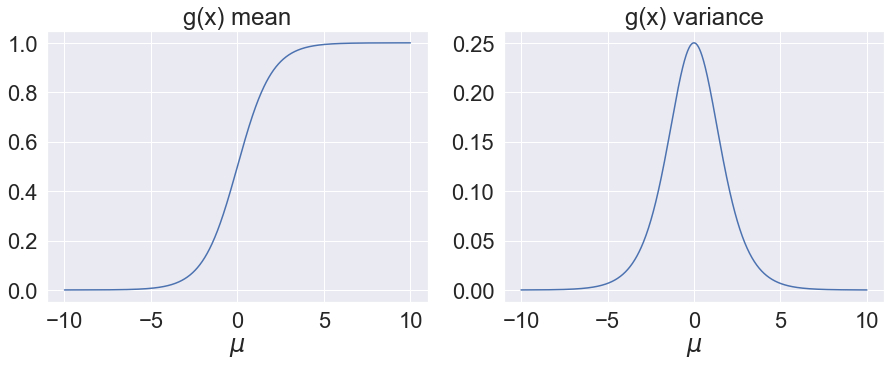

In [111]:
g, axes = plt.subplots(1, 2, figsize=(15, 5))

def sigmoid(x):
    return np.e**x / (1 + np.e**x)

def sigmoid_derr(x):
    return np.e**x / (1 + np.e**x)**2

def sigmoid_sec_derr(x):
    return (np.e**x - np.e**(3*x)) / (1 + np.e**x)**4


es = []
ds = []
mus = np.linspace(-10, 10, 1000)
for mu in mus:
    es.append(sigmoid(mu))
    ds.append(sigmoid_derr(mu)**2)
axes[0].plot(mus, es)
axes[0].set_title('g(x) mean')
axes[0].set_xlabel('$\mu$')
axes[1].plot(mus, ds)
axes[1].set_title('g(x) variance')
axes[1].set_xlabel('$\mu$')

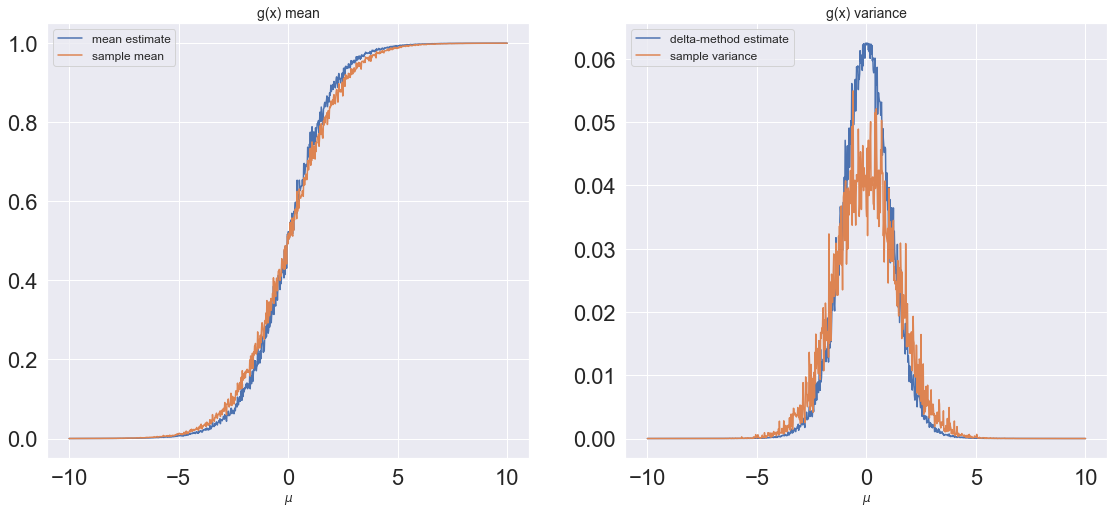

In [134]:
g, axes = plt.subplots(1, 2, figsize=(19, 8))

mu_est = []
mu_real = []
sigma_est = []
sigma_real = []
for mu in mus:
    new_experiment = stats.norm.rvs(loc = mu, scale = 1, size=sample_size) 
    x_mean = new_experiment.mean()
    sigmoid_experiment = sigmoid(new_experiment)
    mu_est.append(sigmoid(x_mean))
    mu_real.append(sigmoid_experiment.mean())
    sigma_est.append(sigmoid_derr(x_mean)**2)
    sigma_real.append(((sigmoid_experiment - sigmoid_experiment.mean())**2).sum() / (sample_size - 1))

axes[0].plot(mus, mu_est, label='mean estimate')
axes[0].plot(mus, mu_real, label='sample mean')
axes[0].set_title('g(x) mean', fontsize=14)
axes[0].set_xlabel('$\mu$', fontsize=12)
axes[0].legend(loc='upper left', fontsize=12)
axes[1].plot(mus, sigma_est, label='delta-method estimate')
axes[1].plot(mus, sigma_real, label='sample variance')
axes[1].set_title('g(x) variance', fontsize=14)
axes[1].set_xlabel('$\mu$', fontsize=12)
axes[1].legend(loc='upper left', fontsize=12)  ;

Судя по графику, чем дальше от 0, тем точнее оценка

Text(0.5, 1.0, "sigmoid's second derrivative")

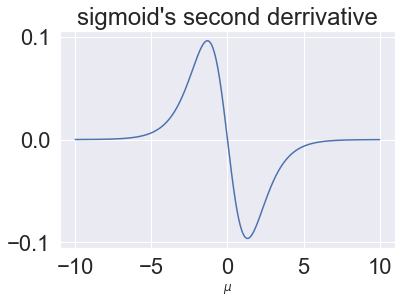

In [119]:
plt.plot(mus, sigmoid_sec_derr(mus))
plt.xlabel('$\mu$', fontsize=12)
plt.title("sigmoid's second derrivative")

Как мы видим, в 0 максимум нашей функции 

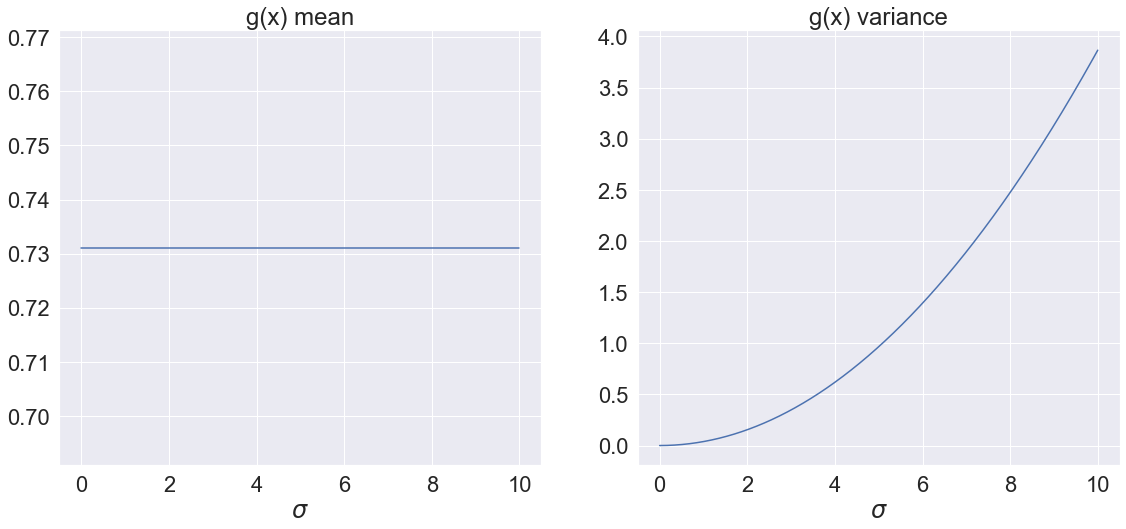

In [135]:
g, axes = plt.subplots(1, 2, figsize=(19, 8))
es = []
ds = []
mu = 1
sigmas = np.linspace(0, 10, 1000)
for sigma in sigmas:
    es.append(sigmoid(mu))
    ds.append(sigmoid_derr(mu)**2 * sigma**2)
axes[0].plot(sigmas, es)
axes[0].set_title('g(x) mean')
axes[0].set_xlabel('$\sigma$')
axes[1].plot(sigmas, ds)
axes[1].set_title('g(x) variance')
axes[1].set_xlabel('$\sigma$');

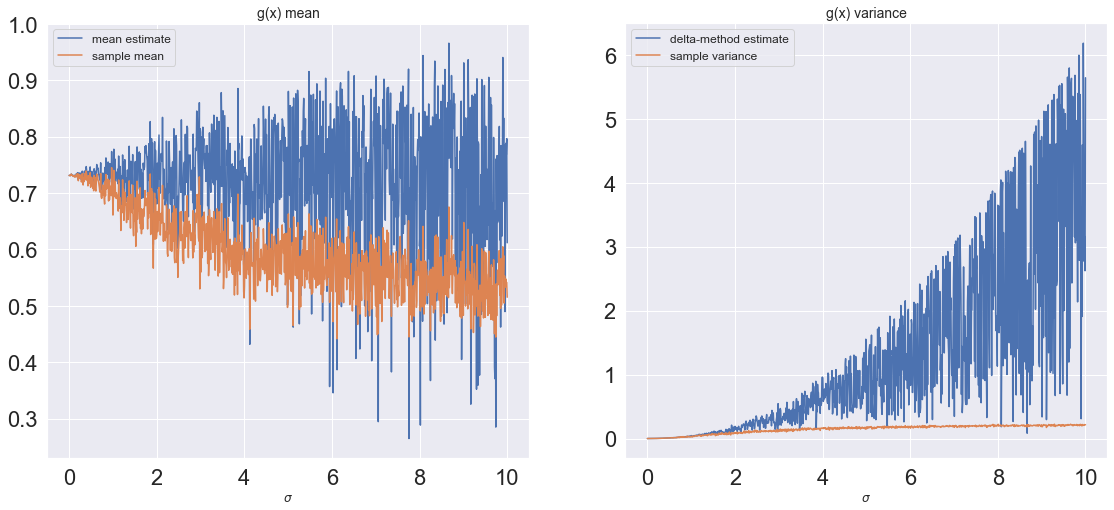

In [136]:
g, axes = plt.subplots(1, 2, figsize=(19, 8))

mu_est = []
mu_real = []
sigma_est = []
sigma_real = []
sigmas = np.linspace(0, 10, 1000)
for sigma in sigmas:
    new_experiment = stats.norm.rvs(loc = 1, scale = sigma, size=sample_size) 
    x_mean = new_experiment.mean()
    sigmoid_experiment = sigmoid(new_experiment)
    mu_est.append(sigmoid(x_mean))
    mu_real.append(sigmoid_experiment.mean())
    sigma_est.append(sigmoid_derr(x_mean)**2 * sigma **2)
    sigma_real.append(((sigmoid_experiment - sigmoid_experiment.mean())**2).sum() / (sample_size - 1))

axes[0].plot(sigmas, mu_est, label='mean estimate')
axes[0].plot(sigmas, mu_real, label='sample mean')
axes[0].set_title('g(x) mean', fontsize=14)
axes[0].set_xlabel('$\sigma$', fontsize=12)
axes[0].legend(loc='upper left', fontsize=12)
axes[1].plot(sigmas, sigma_est, label='delta-method estimate')
axes[1].plot(sigmas, sigma_real, label='sample variance')
axes[1].set_title('g(x) variance', fontsize=14)
axes[1].set_xlabel('$\sigma$', fontsize=12)
axes[1].legend(loc='upper left', fontsize=12)  ;

# 4

$pull(x) = \dfrac{(x - x_{true})}{err}$

Если все хорошо, $pull \sim \mathcal{N}(0, 1)$

## 4.1

$X \sim \Gamma(\alpha, \beta)$


$\alpha \in [0.1, 0.7], \ \beta \in [2, 7]$

Из семинара, мы знаем: 

$$\alpha = \log \beta + \dfrac{1}{n} \sum\log x_i, \ \  \beta = \frac{\alpha n}{\sum\limits_i x_i}$$

Оценка для альфы примерная, поэтому я решила брать численный аргмакс



In [221]:
def get_likelihood(x, a, b):
    return stats.gamma.logpdf(x, a=a, scale= 1 / b).sum()

alphas = np.linspace(0.1, 0.7, 7)
alphas_wide = np.linspace(0.02, 1, 1000)
betas = np.linspace(2, 7, 6)
betas_wide =  np.linspace(0.1, 10, 1000)

grid =  np.transpose([np.tile(alphas, len(betas)),np.repeat(betas,len(alphas))])

pull_df = pd.DataFrame({'alphas' : grid[:, 0], 'betas' : grid[:, 1], 'meana' : [5] * (len(betas) * len(alphas)),
                       'vara' : [5] * (len(betas) * len(alphas)), 'meanb' : [5] * (len(betas) * len(alphas)),
                       'varb' : [5] * (len(betas) * len(alphas))})

for alpha1 in alphas:
    for beta in betas:
        pulls_a = np.array([])
        for i in range(100):
            new_experiment = stats.gamma.rvs(a = alpha1, loc = 0, scale = 1 / beta, size=sample_size)
            best_a = alphas[np.array([get_likelihood(new_experiment, alpha2, beta) for a in alphas_wide]).argmax()]
            best_b = alphas[np.array([get_likelihood(new_experiment, alpha2, b) for b in betas_wide]).argmax()]
            max_likelihood_a = get_likelihood(new_experiment, best_a, beta)
            max_likelihood_b = get_likelihood(new_experiment, alpha1, best_b)
            interval = []
            for alpha2 in alphas_wide:              
                likelihood = get_likelihood(new_experiment, alpha2, beta)
                if likelihood - max_likelihood_a > -cut_level:
                    interval.append(alpha2) 
            pulls_a = np.append(pulls, 2 * (best_a - alpha1) / (interval[-1] - interval[0]))
            for alpha2 in alphas_wide:              
                likelihood = get_likelihood(new_experiment, alpha2, beta)
                if likelihood - max_likelihood_a > -cut_level:
                    interval.append(alpha2) 
            pulls_a = np.append(pulls, 2 * (best_a - alpha1) / (interval[-1] - interval[0]))
        idx = int((alpha1 / 0.1 - 1) + (beta - 2) * 7)
        pull_df.at[idx , 'meana'] = pulls.mean()
        pull_df.at[idx, 'vara'] = ((pulls - pulls.mean())**2).sum() / 99



KeyboardInterrupt: 

In [ ]:
sns.heatmap(pull_df.pivot_table(
                        index='alphas', 
                        columns='betas', 
                        values='mean'), cmap="YlGnBu", linewidth = 0.5, square=True )

print(pull_df.pivot_table(
                        index='alphas', 
                        columns='betas', 
                        values='mean'))

In [ ]:
sns.heatmap(pull_df.pivot_table(
                        index='alphas', 
                        columns='betas', 
                        values='var'), cmap="YlGnBu", linewidth = 0.5, square=True )

print(pull_df.pivot_table(
                    index='alphas', 
                    columns='betas', 
                    values='var'))